In [103]:
def spatial_derivative(B, dx, order = 6, ghost_zone_type = 'symmetric'):
    '''
    This function calculates the spatial derivatives of the magnetic field B.
    
    Parameters:
    B: 2D array
        The magnetic field B.
    dx: float
        The spatial step size.
    order: int
        The order of the finite difference scheme. It can be 2, 4, 6, 8 or 10.
        Default is 6.
    ghost_zone_type: str
        The type of the ghost zone. It can be 'anti-symmetric', 'symmetric', 'relative anti-symmetric' or None.
        Default is 'relative anti-symmetric'.
        
    Returns:
    dBdx: 2D array
        The spatial-derivative of the magnetic field B.
    ddBddx: 2D array
        The second z-derivative of the magnetic field B.
    '''

    dBdx = np.zeros(B.shape)
    ddBddx = np.zeros(B.shape)

    # print(f"The shape of B is {B.shape}")
    # print(f"The shape of dBdx is {dBdx.shape}")
    # print(f"The shape of ddBddx is {ddBddx.shape}")
    
    B = np.copy(B) # to avoid modifying the original array
    
    if order not in ['np',2, 4, 6, 8, 10]:
        raise ValueError("Order should be 'np',2, 4, 6, 8 or 10")
    
    if ghost_zone_type not in ['anti-symmetric', 'symmetric', 'relative anti-symmetric', None]:
        raise ValueError('ghost_zone_type should be anti-symmetric, symmetric, relative anti-symmetric or None')

    if order == 'np':
        ghost_zone = 3 # 3 cells on each side
    else:
        ghost_zone = int(order/2)
    
    if ghost_zone_type == 'relative anti-symmetric':
        B = np.pad(B, ((0, 0), (ghost_zone, ghost_zone)), mode='constant')
        for i in range(ghost_zone):
            B[:,i] = (2 * B[:,ghost_zone]) - B[:,ghost_zone + ghost_zone - i] # correcting the start of the array
            B[:, -1 - i] = 2 * B[:,-ghost_zone - 1] - B[:, (- ghost_zone - 1) - ghost_zone + i] # correcting the end of the array
    elif ghost_zone_type == 'anti-symmetric':
        B = np.pad(B, ((0, 0), (ghost_zone, ghost_zone)), mode='reflect') # makes symmetric padding
        for i in range(ghost_zone): 
            B[:,i] = - B[:, i] # making anti-symmetric at the start of the array
            B[:, -1 - i] = - B[:, -1 - i] # making anti-symmetric at the end of the array
    elif ghost_zone_type == 'symmetric':
        B = np.pad(B, ((0, 0), (ghost_zone, ghost_zone)), mode='symmetric')
    else:
        B = np.pad(B, ((0, 0), (ghost_zone, ghost_zone)), mode='constant') # zero padding

    # print(f"The shape of B after padding is {B.shape}")
    # print(f"The shape of dBdx after padding is {dBdx.shape}")
    # print(f"The shape of ddBddx after padding is {ddBddx.shape}")
    
    if order == 6:
        for i in range(ghost_zone, B.shape[1] - ghost_zone):
            dBdx[:,i-ghost_zone] = ((- B[:,i - 3]) + (9 * B[:,i - 2]) - (45 * B[:,i - 1]) + (45 * B[:,i + 1]) - (9 * B[:,i + 2]) + (B[:,i + 3])) / (60 * dx)
            ddBddx[:,i-ghost_zone] = ((2 * B[:,i - 3]) - (27 * B[:,i - 2]) + (270 * B[:,i - 1]) - (490 * B[:, i]) + (270 * B[:,i + 1]) - (27 * B[:,i + 2]) + (2 * B[:,i + 3])) / (180 * (dx ** 2))
    elif order == 2:
        for i in range(ghost_zone, B.shape[1] - ghost_zone):
            dBdx[:,i-ghost_zone] = ((- B[:,i - 1]) + (B[:,i + 1])) / (2 * dx)
            ddBddx[:,i-ghost_zone] = (B[:,i - 1] - (2 * B[:, i]) + B[:,i + 1]) / (dx ** 2)
    elif order == 4:
        for i in range(ghost_zone, B.shape[1] - ghost_zone):
            dBdx[:,i-ghost_zone] = ((B[:,i - 2]) - (8 * B[:,i - 1]) + (8 * B[:,i + 1]) - (B[:,i + 2])) / (12 * dx)
            ddBddx[:,i-ghost_zone] = ((- B[:,i - 2]) + (16 * B[:,i - 1]) - (30 * B[:,i]) + (16 * B[:,i + 1]) - (B[:,i + 2])) / (12 * (dx ** 2))
    elif order == 8:
        for i in range(ghost_zone, B.shape[1] - ghost_zone):
            dBdx[:,i-ghost_zone] = ((3*B[:,i - 4]) - (32 * B[:,i - 3]) + (168 * B[:,i - 2]) - (672 * B[:,i - 1]) + (672 * B[:,i + 1]) - (168 * B[:,i + 2]) + (32 * B[:,i + 3]) - (3 * B[:,i + 4])) / (840 * dx)
            ddBddx[:,i-ghost_zone] = ((-9 * B[:,i - 4]) + (128 * B[:,i - 3]) - (1008 * B[:,i - 2]) + (8064 * B[:,i - 1]) - (14350 * B[:,i]) + (8064 * B[:,i + 1]) - (1008 * B[:,i + 2]) + (128 * B[:,i + 3]) - (9 * B[:,i + 4])) / (5040 * (dx ** 2))
    elif order == 10:
        for i in range(ghost_zone, B.shape[1] - ghost_zone):
            dBdx[:,i-ghost_zone] = ((-2 * B[:,i - 5]) + (25 * B[:,i - 4]) - (150 * B[:,i - 3]) + (600 * B[:,i - 2]) - (2100 * B[:,i - 1]) + (2100 * B[:,i + 1]) - (600 * B[:,i + 2]) + (150 * B[:,i + 3]) - (25 * B[:,i + 4]) + (2 * B[:,i + 5])) / (2520 * dx)
            ddBddx[:,i-ghost_zone] = ((8 * B[:,i - 5]) - (125 * B[:,i - 4]) + (1000 * B[:,i - 3]) - (6000 * B[:,i - 2]) + (42000 * B[:,i - 1]) - (73766 * B[:, i]) + (42000 * B[:,i + 1]) - (6000 * B[:,i + 2]) + (1000 * B[:,i + 3]) - (125 * B[:,i + 4]) + (8 * B[:,i + 5])) / (25200 * (dx ** 2))
    else:
        dBdx = np.gradient(B, dx, axis=1)
        ddBddx = np.gradient(dBdx, dx, axis=1)
        
        # removing the ghost zones
        dBdx = dBdx[:,ghost_zone:-ghost_zone]
        ddBddx = ddBddx[:,ghost_zone:-ghost_zone]


            
    # update with other orders
    
    return dBdx, ddBddx

In [104]:
import numpy as np  
import matplotlib.pyplot as plt  
import scipy 
import math  


# finite difference method to calculate the second derivative of a function
def d2f(f, dz, Nz):
    sol = np.zeros((Nz))  # Initialize solution array
    for i in range(1, Nz - 2):
        sol[i] = (f[i - 1] - 2 * f[i] + f[i + 1]) / (dz * dz)
    # Apply boundary conditions at i=0
    sol[0] = (2 * f[0] - 5 * f[1] + 4 * f[2] - f[3]) / (dz * dz)
    # Apply boundary conditions at i=Nz-1
    sol[Nz - 1] = (2 * f[Nz - 1] - 5 * f[Nz - 2] + 4 * f[Nz - 3] - f[Nz - 4]) / (dz * dz)
    return sol

def df(f,dz,Nz):
    sol = np.zeros((Nz))
    i=0
    sol[i]=((2*f[i])-(5*f[i+1])+(4*f[i+2])-f[i+3])/(dz*dz)
    i=Nz-1
    sol[i]=((2*f[i])-(5*f[i-1])+(4*f[i-2])-f[i-3])/(dz*dz)
    for i in range(1,Nz-2):
        sol[i]=(f[i-1]+(-2*f[i])+f[i+1])/(dz*dz)
    return sol

def solve2(Br_t0,Bphi_t0,Nz,Nt,time_plot,Bphi_z0,Bphi_zf,Br_z0,Br_zf,D):
    #intials()
    Br=[]
    Bphi=[]
    decay=[]
    comp=[]

    if 0 in time_plot:
        Br.append(Br_t0)
        Bphi.append(Bphi_t0)

    
    for j in range(0, Nt + 1):
        
        k1r = dBrdt(Br_t0,Bphi_t0,z,D,alpha,dz,Nz)
        k1phi = dBphidt(Br_t0,Bphi_t0,z,D,alpha,dz,Nz)
        
        k2r = dBrdt(Br_t0+k1r*dt/2, Bphi_t0+k1phi*dt/2, z,D,alpha,dz,Nz)
        k2phi = (dBphidt(Br_t0+k1r*dt/2, Bphi_t0+k1phi*dt/2, z,D,alpha,dz,Nz)) 
        
        k3r = (dBrdt(Br_t0+k2r*dt/2,Bphi_t0+k2phi*dt/2,z,D,alpha,dz,Nz)) 
        k3phi = (dBphidt(Br_t0+k2r*dt/2,Bphi_t0+k2phi*dt/2,z,D,alpha,dz,Nz)) 
        
        k4r = (dBrdt(Br_t0+k3r*dt,Bphi_t0+k3phi*dt/2,z,D,alpha,dz,Nz)) 
        k4phi = (dBphidt(Br_t0+k3r*dt/2,Bphi_t0+k3phi*dt,z,D,alpha,dz,Nz))
        Br_t0 = Br_t0 + ((dt / 6.0) * (k1r +( 2 * k2r) + (2 * k3r) + k4r))
        
        Bphi_t0 = Bphi_t0 + ((dt / 6.0) * (k1phi + (2 * k2phi) + (2 * k3phi) + k4phi))
               
        # #(Anti Symmetric Ghost Zone)
        # Bphi_t0[1]=Bphi_z0
        # Br_t0[Nz-2]=Br_zf
        # Br_t0[1]=Br_z0
        # Bphi_t0[Nz-2]=Bphi_zf
        # Br_t0[Nz-1]=Br_z0-Br_t0[Nz-3]
        # Bphi_t0[Nz-1]=Bphi_z0-Bphi_t0[Nz-3]
        # Br_t0[0]=Br_z0-Br_t0[2]
        # Bphi_t0[0]=Bphi_z0-Bphi_t0[2]

        #  #(Anti Symmetric Ghost Zone)
        # Bphi_t0[1]=Tfn(z0,j*dt)
        # Br_t0[Nz-2]=Br_zf
        # Br_t0[1]=Br_z0
        # Bphi_t0[Nz-2]=Bphi_zf
        # Br_t0[Nz-1]=Br_z0-Br_t0[Nz-3]
        # Bphi_t0[Nz-1]=Tfn(z0,j*dt)-Bphi_t0[Nz-3]
        # Br_t0[0]=Br_z0-Br_t0[2]
        # Bphi_t0[0]=Tfn(z0,j*dt)-Bphi_t0[2]


         #(Anti Symmetric Ghost Zone)
        Bphi_t0[0]=Tfn(z0,j*dt)
        Br_t0[Nz-2]=Br_zf
        Br_t0[1]=Br_z0
        Bphi_t0[Nz-1]=20
        Br_t0[Nz-1]=Br_z0-Br_t0[Nz-3]
        
        Br_t0[0]=Br_z0-Br_t0[2]
        


        #decay.append(np.log10(np.sqrt((np.mean(Br_t0))**2+(np.mean(Bphi_t0))**2)))
        comp.append(Bphi_t0)

        if j in time_plot:
            Br.append(Br_t0)
            Bphi.append(Bphi_t0)
            #B_pitch.append(np.copy(B))

    pitch=np.arctan(np.array(Br)/np.array(Bphi))
    return Br,Bphi,pitch,decay,comp




In [105]:

# Equation for temperature distribution
#T(z,t)=T_surface+A*sin(2*np.pi*t/To)
A=5
T_surface=20
# To=24*3600
To=30
# z=10

# C_w=4174000
# C_s=2104000
C_s=1739
C_w=4180
rho_w=1000
rho_s=2650
lamb=2
qf=4*10**(-7)
rho=rho_s


a1=(((((np.pi*C_s*rho)/(lamb*To))**2)+1/4*(qf*C_w*rho_w/(2*lamb))**4)**0.5+1/2*((qf*C_w*rho_w/(2*lamb))**2))**0.5-(qf*C_w*rho_w/(2*lamb))
b1=(((((np.pi*C_s*rho)/(lamb*To))**2)+1/4*(qf*C_w*rho_w/(2*lamb))**4)**0.5+1/2*((qf*C_w*rho_w/(2*lamb))**2))**0.5

def Tfn(x,t):
    return (A*np.exp(-a1*x)*np.sin(-b1*x+(2*np.pi*t/To)))+20

In [106]:
# def Bphi_t0(z):
#     return 6*np.sin((np.pi)*z/2)+np.sin(np.pi*z*3)

def Bphi_t0(z):
    return Tfn(z,0)

def Br_t0(z):
    return 6*np.sin((np.pi)*z)


def alphafn(r):
    return (-1)
# def dBrdt(Br_t0,Bphi_t0,z,D,alpha,dz,Nz):
#     return (d2f(Br_t0,dz,Nz)-df(alpha*alphafn(z)*Bphi_t0,dz,Nz))

def dBrdt(Br_t0,Bphi_t0,z,D,alpha,dz,Nz):
    return ((d2f(Br_t0,dz,Nz)/10000000)-(2*df(Bphi_t0,dz,Nz)))


def dBphidt(Br_t0,Bphi_t0,z,D,alpha,dz,Nz):
    return ((-d2f(Bphi_t0,dz,Nz)/10000)+(df(Bphi_t0,dz,Nz)/750))

# def dBphidt(Br_t0,Bphi_t0,z,D,alpha,dz,Nz):
#     return (((-2/23103040000*d2f(Bphi_t0,dz,Nz))+(df(Bphi_t0,dz,Nz)*417400000000/23103040000)))


# def dBphidt(Br_t0,Bphi_t0,z,D,alpha,dz,Nz):
#     return (-(ddBddz[1]/1000000)+((dBdz[1])))


z0 = 0.0  # start of spatial region in z
zf = 1.5  # end of spatial domain in z
t0=0.0
tf = 30 
Nz = 100  # Number of spatial grid points
Nt = 20000  # Number of time steps
dz = (zf - z0) / (Nz - 1)  # Spatial step size
dt = tf / Nt  # Time step size



z = np.linspace(z0, zf, Nz)
tt = np.linspace(t0, tf, Nt+1)

Br_t0=Br_t0(z)
Bphi_t0=Bphi_t0(z)

Bphi_z0=20
Bphi_zf=20
Br_z0=0
Br_zf=0

#print(Bphi_z0,Bphi_zf,Br_z0,Br_zf)
# time_plot=[int(Nt/5),int(Nt/2),int(Nt/1.5),int(Nt/1.2),int(Nt/1.1),Nt]

time_plot=[0,10,100,10000,10500,11000,11500]
D, alpha = -1, 1

In [107]:
dz = (zf - z0) / (Nz - 1)  # Spatial step size
order = 6
ghost_zone_type = 'anti-symmetric'

B = np.zeros((2, Nz))
B[0, :] = Br_t0 # first row is B_r
B[1, :] = Bphi_t0 # second row is B_phi
dBdz, ddBddz = spatial_derivative(B, dz, order, ghost_zone_type)

# def dBphidt(Br_t0,Bphi_t0,z,D,alpha,dz,Nz):
#     return ((-d2f(Bphi_t0,dz,Nz)/10000)+(df(Bphi_t0,dz,Nz)/1000))

# def dBphidt(Br_t0,Bphi_t0,z,D,alpha,dz,Nz):
#     return (((-2/23103040000*d2f(Bphi_t0,dz,Nz))+(df(Bphi_t0,dz,Nz)*417400000000/23103040000)))


def dBphidt2(Br_t0,Bphi_t0,z,D,alpha,dz,Nz):
    return (-(ddBddz[1]/10000)+(dBdz[1]/1000))


print(dBphidt(Br_t0,Bphi_t0,z,D,alpha,dz,Nz))
print(dBphidt2(Br_t0,Bphi_t0,z,D,alpha,dz,Nz))

[ 7.25379924e-02  2.90193021e-02 -1.44993882e-02 -6.84431378e-06
  1.81173815e-09  3.22563523e-12  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [108]:
dz = (zf - z0) / (Nz - 1)  # Spatial step size
order = 6
ghost_zone_type = 'symmetric'

B = np.zeros((2, Nz))
B[0, :] = Br_t0 # first row is B_r
B[1, :] = Bphi_t0 # second row is B_phi
dBdz, ddBddz = spatial_derivative(B, dz, order, ghost_zone_type)

# print(dBdz)

# kkk=df(Bphi_t0,dz,Nz)
# print(kkk)

In [109]:
Q,W,E,R,comp=solve2(Br_t0,Bphi_t0,Nz,Nt,time_plot,Bphi_z0,Bphi_zf,Br_z0,Br_zf,D)
   

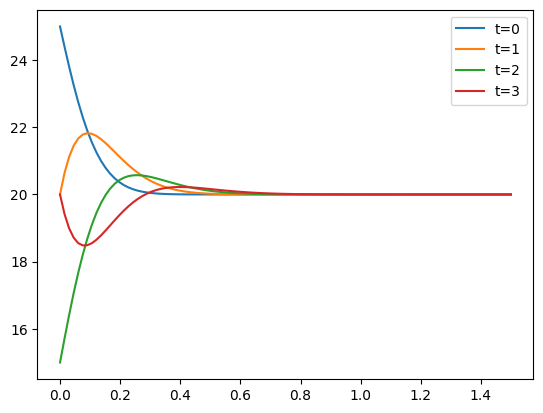

In [110]:

complot=[comp[5000],comp[10000],comp[15000],comp[20000]]
for i in range(len(complot)):
    plt.plot(z,complot[i],label=f't={i}')

# for i in range(len(plotanlyt)):
#     plt.scatter(z,plotanlyt[i],label=f't={i}')

plt.legend()
plt.show() 




In [111]:
A=5
T_surface=20
To=24*3600


# C_w=4174000
# C_s=2104000
C_s=1739
C_w=4180
rho_w=1000
rho_s=2650
lamb=2
qf=4*10**(-7)
rho=rho_s


a1=(((((np.pi*C_s*rho)/(lamb*To))**2)+1/4*(qf*C_w*rho_w/(2*lamb))**4)**0.5+1/2*((qf*C_w*rho_w/(2*lamb))**2))**0.5-(qf*C_w*rho_w/(2*lamb))
b1=(((((np.pi*C_s*rho)/(lamb*To))**2)+1/4*(qf*C_w*rho_w/(2*lamb))**4)**0.5+1/2*((qf*C_w*rho_w/(2*lamb))**2))**0.5

def Tfnn(x,t):
    return (A*np.exp(-a1*x)*np.sin(-b1*x+(2*np.pi*t/To)))+20



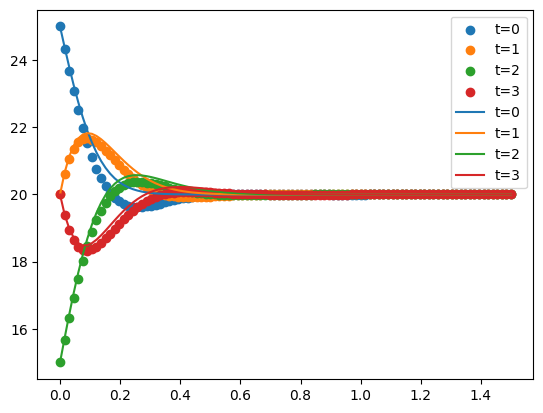

In [112]:

zz=np.linspace(0,1.5,100)

complot=[comp[5000],comp[10000],comp[15000],comp[20000]]

plotanlyt=[Tfnn(zz,(6*3600)),Tfn(zz,(12*3600)),Tfn(zz,(18*3600)),Tfn(zz,(24*3600))]

for i in range(len(plotanlyt)):
    plt.scatter(zz,plotanlyt[i],label=f't={i}')

for j in range(len(complot)):
    #print(complot[j])
    plt.plot(z,complot[j],label=f't={j}')

# for i in range(len(plotanlyt)):
#     plt.scatter(z,plotanlyt[i],label=f't={i}')

plt.legend()
plt.show() 



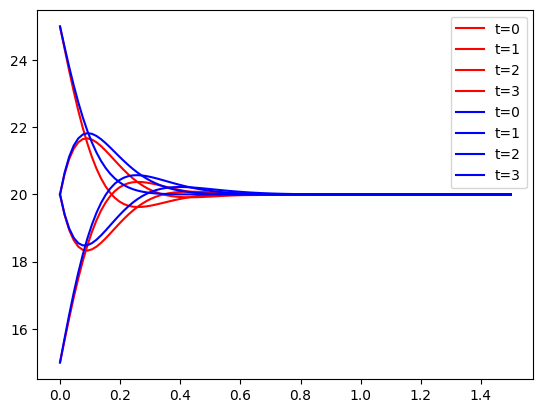

In [113]:
zz=np.linspace(0,1.5,100)

complot=[comp[5000],comp[10000],comp[15000],comp[20000]]

plotanlyt=[Tfnn(zz,(6*3600)),Tfn(zz,(12*3600)),Tfn(zz,(18*3600)),Tfn(zz,(24*3600))]

for i in range(len(plotanlyt)):
    plt.plot(zz,plotanlyt[i],color='Red',label=f't={i}')

for j in range(len(complot)):
    #print(complot[j])
    plt.plot(z,complot[j],color="Blue",label=f't={j}')

# for i in range(len(plotanlyt)):
#     plt.scatter(z,plotanlyt[i],label=f't={i}')

plt.legend()
plt.show() 